# Project : Churn Prediction

## Reading Files into Python

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
#importing data
data = pd.read_csv('/content/churn_prediction.csv')

In [5]:
#first 5 instances using "head()" function
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [6]:
#last 5 instances using "tail()" function
data.tail()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0
28381,30301,2349,18,Male,0.0,student,1232.0,2,474,59.0,2107.05,2821.34,3213.44,4447.45,0.11,7.44,714.40,1094.09,2402.62,3260.58,1


In [7]:
#finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(28382, 21)

In [8]:
#Printing all the columns present in data
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

## Variable Identification and Typecasting

In [9]:
# A closer look at the data types present in the data
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

There are a lot of variables visible at one, so let's narrow this down by looking **at one datatype at once**. We will start with int


### Integer Data Type

In [10]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

Summary:

*    **Customer id** are a unique number assigned to customers. It is are **Okay as Integer**.

*    **branch code** again represents different branches, therefore it should be **convereted to category**.

*    **Age** and **Vintage** are also numbers and hence we are okay with them as integers.

*    **customer_networth_category** is supposed to be an ordinal category, **should be converted to category**.

*    **churn** : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This **needs to be converted to category datatype**.


In [11]:
# converting churn to category
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data.dtypes[data.dtypes == 'int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

### Float Data Type

In [12]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

dependents                        float64
city                              float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

Summary:

*    **dependents** is expected to be a whole number. **Should be changed to integer type**

*    **city** variable is also a unique code of a city represented by some interger number. **Should be converted to Category type**

*    Rest of the variables like **credit, balance and debit** are best represented by the float variables.

In [13]:
# converting "dependents" and "city" to their respective types
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# checking
data[['dependents','city']].dtypes

dependents       Int64
city          category
dtype: object

### Object Data Type

In [14]:
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                              object
dependents                           Int64
occupation                          object
city                              category
customer_nw_category              category
branch_code                       category
days_since_last_transaction        float64
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
dtype: object

*    **variables like 'gender', 'occupation' and 'last_transaction' are of type object**. This means that **Pandas was not able to recognise the datatype** of these three variables.

In [16]:
# Manually checking object types
data[['gender','occupation','days_since_last_transaction']].head(7)

,gender,occupation,days_since_last_transaction
0,Male,self_employed,224.0
1,Male,self_employed,60.0
2,Male,salaried,NaN
3,NaN,self_employed,147.0
4,Male,self_employed,58.0
5,Female,self_employed,60.0
6,Male,retired,98.0


*    **gender** and **occupation** variables **belong to categorical data types**.
*    **last_transaction** should be a  **datetime variable**.

In [17]:
# typecasting "gender" and "occupation" to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# checking
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

### datetime Data Type

In [19]:
# creating an instance(date) of DatetimeIndex class using "days_since_last_transaction"
date = pd.DatetimeIndex(data['days_since_last_transaction'])

In [20]:
# extracting new columns from "last_transaction"

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

In [22]:
# checking new extracted columns using datetime
data[['days_since_last_transaction','doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']].head()

,days_since_last_transaction,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,224.0,1.0,1.0,1.0,3.0
1,60.0,1.0,1.0,1.0,3.0
2,NaN,NaN,NaN,NaN,NaN
3,147.0,1.0,1.0,1.0,3.0
4,58.0,1.0,1.0,1.0,3.0


The first column is the complete date of the last transaction which was done by the any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

**Breaking down the date variable** into these granular information will **help us in understand when the last transaction was done from different perspectives**. Now that we have extracted the essentials from the last_transaction variables, we will drop it from the dataset.



In [23]:
data = data.drop(columns = ['days_since_last_transaction'])
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

## Univariate Analysis: Numerical Variables

In [24]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
woy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object

In [25]:
# seggregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [26]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### customer_information

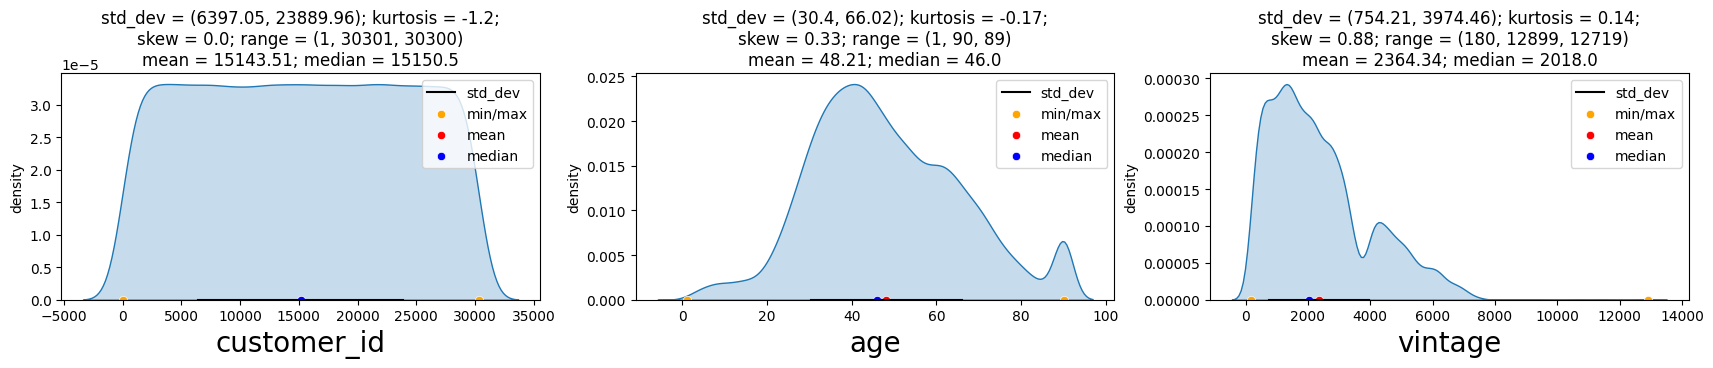

In [27]:
UVA_numeric(data,customer_details)

**Summary of Customer_Information:**
*    **customer_id**:
     *    variable is **unique for every customer, Hence uniform** distribution.
     * This variable **does not contribute any information**
     * Can be eliminated from data

*    **age**:
    *    Median Age = 46
    *    **Most customers age between 30 to 66**
    *    skewness +0.33 : customer age is **negligibly biased towards younger age**
    *    **kurtosis = -0.17**; very less likely to have extreme/outlier values.
*    **vintage:**
    *    Most customers joined between 2100 and 2650 days from the day of data extraction.
    *    **skewness** -1.42 : this is left skewed, **vintage variable is significantly biased towards longer association of customers.**
    *    **Kurtosis = 2.93**: Extreme values and Outliers are very likely to be present in vintage.

**Things to Investigate Further down the road:**
*    The batch of **high number of very Old Age customers** in age variable.

### current_month

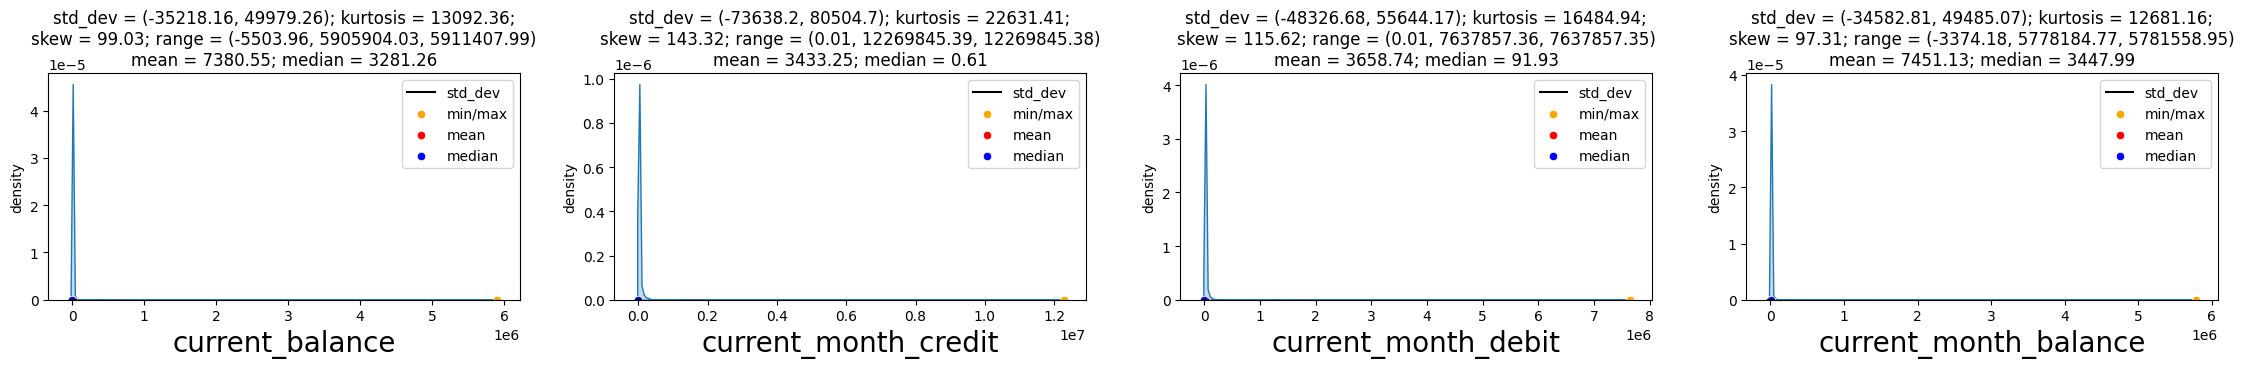

In [28]:
UVA_numeric(data,current_month)

**Summary**
*    Considering the kurtosis and skewness value  for all 4 of these plots. Outliers/Extreme values are obvious.


**Need to Remove Outliers to visulaise these plots**

In [34]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[current_month]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor*cm_data['current_month_balance'].std()]

# checking how many points removed
len(data), len(cm_data)

(28382, 27113)

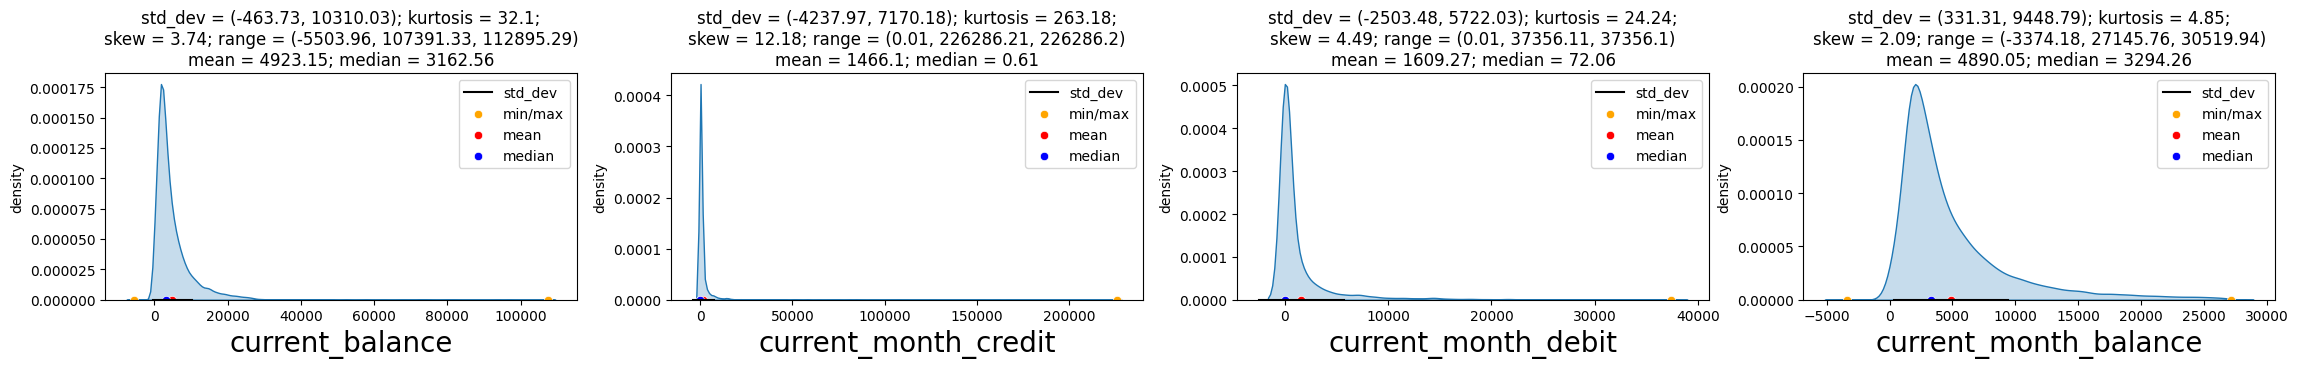

In [30]:
UVA_numeric(cm_data,current_month)

**Summary of current_month**
*    After Removing extreme/outliers, plots are still very skewed.

**Things to investigate further down**
1.    **Is there thete any common trait/relation between the customers who are performing high transaction credit/debits?**
2.    **Customers who are performinng high amount of transactions, are they doinng it every month?**

### previous_month

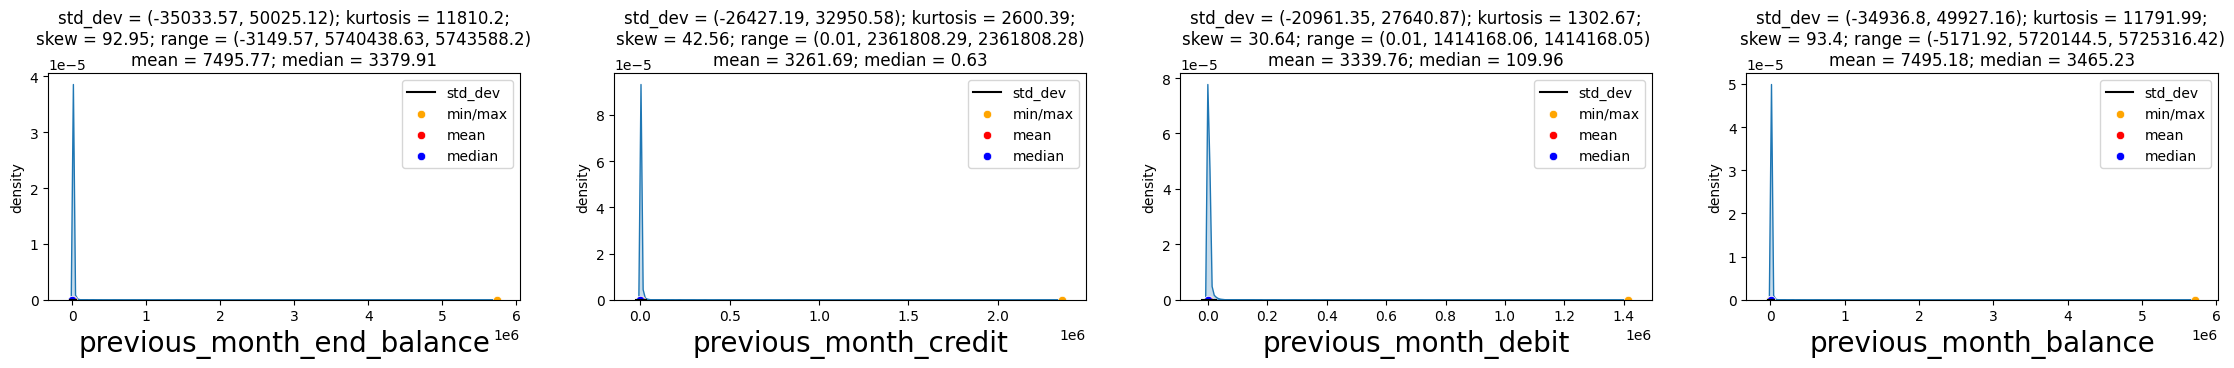

In [31]:
UVA_numeric(data,previous_month)

**Summary of previous_month**
*    This looks very similar to current_month. Most of the customers perform low amount transactions.

### previous_quarters

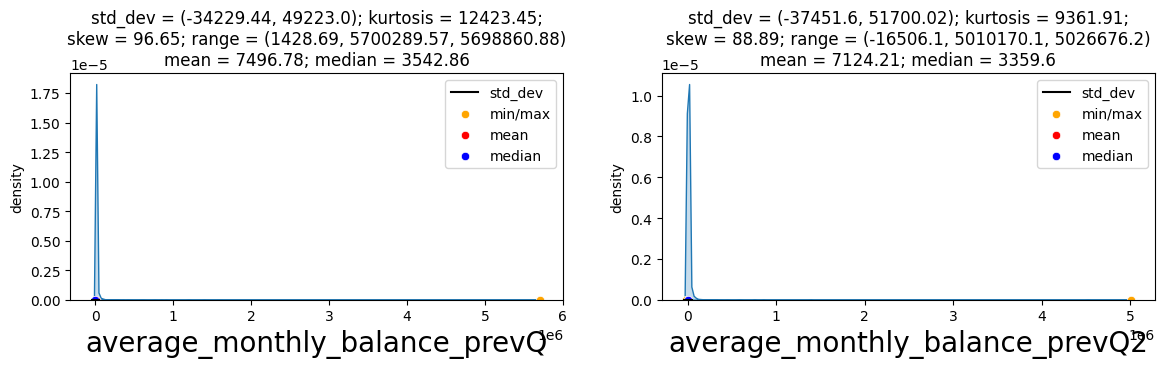

In [32]:
UVA_numeric(data,previous_quarters)

**Summary**
The general trend still follows, it is crutial that we find the out if there is any common trait between the customers doing high high amount of transactions.

### transaction_date

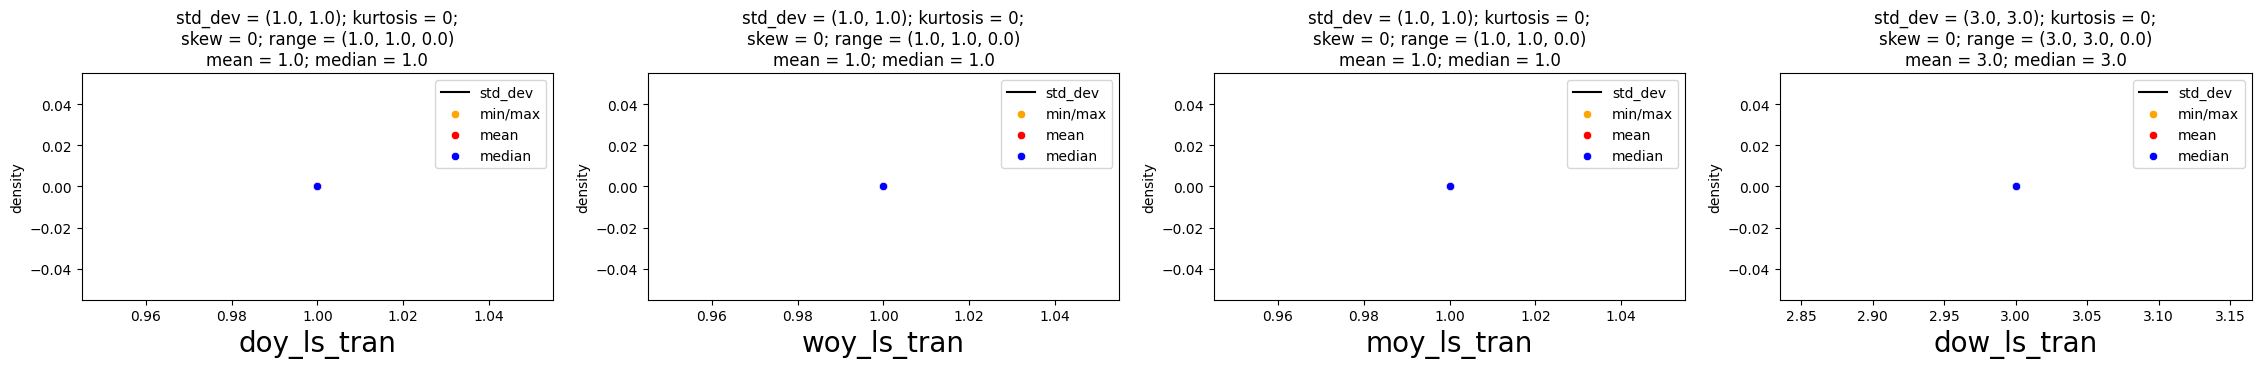

In [33]:
UVA_numeric(data,transaction_date)

**Summary**
*    **Day_of_Year**:
    *    most of the last transactions were made in the last 60 days of the extraction of data.
    *    There are transactions which were made also an year ago.

*   **Week_of_year and Month_of_year**: these variable validate the findings from the **day_of_year**.
*    **Day_of_Week**: Tuesdays are often the favoured day relative to others.

**Things to investigate further Down**
*    **Customers whose last transaction was 6 months ago, did all of them churn?**

## Univariate Analysis : Categorical Varibales

In [ ]:
data.select_dtypes(exclude=['int64','float64','Int64']).dtypes

**Grouping Varibales**

* **customer_info**: gender, occupation, customer_nw_category
* **account_info**: city, branch_code
* **churn**

In [ ]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### customer_info

In [ ]:
UVA_category(data, ['occupation', 'gender', 'customer_nw_category'])

**Summary**
* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* Gender:
  *  Males accounts are 1.5 times more than Female Accounts.

* customer_nw_category:
  *  Half of all the accounts belong to the 3rd net worth category.
  *  Less than 15% belong to the highest net worth category.

**Things to investigate further down:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

### account_info

In [ ]:
UVA_category(data, ['city', 'branch_code'])

In [ ]:
#Plotting "city"
plt.figure(figsize = (5,5), dpi = 120)
city_count = data['city'].value_counts(normalize=True)
sns.barplot(city_count.index, city_count , order = city_count.index)
plt.xlabel('City')
plt.ylabel('fraction/percent')
plt.ylim(0,0.02)

In [ ]:
#Plotting "branch_code"
plt.figure(figsize = (5,5), dpi = 120)
branch_count = data['branch_code'].value_counts()
sns.barplot(branch_count.index, branch_count , order = branch_count.index)
plt.xlabel('branch_code')
plt.ylabel('fraction/percent')
#plt.ylim(0,0.02)

**Summary:**
for both variable "city" and "branch_code", there are too many categories. There is clear relation that some branches and cities are more popular with customers and and this trend decreases rapidly.

**Things to investigate further Down**
* Popular cities and branch code might be able to explain the skewness and outliers of credit/debit variables.
* Possibility that cities and branch code with very few accounts may lead to churning.

### churn

In [ ]:
UVA_category(data, ['churn'])

**Summary**
* Number of people who churned are 1/4 times of the people who did not churn in the given data.

## Univariate: Missing Values

In [ ]:
# finding number of missing values in every variable
data.isnull().sum()

**Things to investigate further down:**
*    Gender: Do the customers with missing gender values have some common behaviour in-
  * churn: do missing values have any relation with churn?

* Dependents:
 * Missing values might be similar to zero dependents
 * churn: do missing values have any relation with churn?

* Occupation:
 * Do missing values have similar behaviour to any other occupation
 * do they have some relation with churn?

* city:
  * the respective cities can be found using branch_code

* last_transaction:
  * checking their previous month and current month and previous_quarter activity might give insight on their last transaction.

* For almost all the above:

  * vintage: might be recording errors from same period of joining
  * branch_code: might be recording error from certain branch


## Univariate Analysis: Outliers

**We suspected outliers in current_month and previous_month variable groups. We will verify that using bo plots**

In [ ]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

### current_month and previous_month

In [ ]:
UVA_outlier(data, current_month,)

In [ ]:
UVA_outlier(data, current_month, include_outlier=False)

In [ ]:
UVA_outlier(data, previous_month)

In [ ]:
UVA_outlier(data, previous_month, include_outlier=False)

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

### previous quarters

In [ ]:
UVA_outlier(data,previous_quarters)

In [ ]:
UVA_outlier(data,previous_quarters, include_outlier = False)

Summary:
* Outliers in previous two quarters are very similar but significantly large in number.

## Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2.  Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn? 
5. Possibility that cities and branch code with very few accounts may lead to churning.


## Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2.  Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn? 
5. Possibility that cities and branch code with very few accounts may lead to churning.


## Bivariate Analysis : Numerical-Numerical

In [ ]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

### Correlation Matrix

In [ ]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

### Heatmap

In [ ]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)



* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the transaction variables and balance variables.

In [ ]:
# extracting transaction information of current and previous months
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

In [ ]:
# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

**Inferences:**


1.   Transaction variables like credit/debit have a strong correlation among themselves.
2.  Balance variables have strong correlation among themselves.
3.   Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.



### Scatterplot

In [ ]:
# Grouping variables
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

In [ ]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

**the scatter plot is is not meaningful due to the presence of outliers**

In [ ]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

In [ ]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

**Inferences**
1.    This validates the high correlation between the transaction variables.
2.    This high correlation can be used for feature engineering during the later stages.

In [ ]:
# balance variables
plt.figure(dpi=140)
sns.pairplot(numerical[balance])

**Inferences**
1.    This validates the high correlation between the balance variables.
2.    This high correlation can be used for feature engineering during the later stages.

In [ ]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(numerical['average_monthly_balance_prevQ'], numerical['average_monthly_balance_prevQ2'])

**Inferences**
1.    This validates the high correlation between the two previous quarters
2.    This high correlation can be used for feature engineering during the later stages.

In [ ]:
## Multivariate Analysis

### Pivot Table

We are using Pivot table to comply with the objective of identifying the Churning Customers Profile using multiple categorical features.
First, Let's use Gender, Occupation and Customer Net worth category and derive insights from the Pivot Table

### Gender, Occupation, Customer Net worth category with Churn

In [ ]:
data['gender'] = data['gender'].astype('object')
data['occupation'] = data['occupation'].astype('object')
data['customer_nw_category'] = data['customer_nw_category'].astype('object')
data['churn'] = data['churn'].astype('int')
data['city'] = data['city'].astype('float')
data['branch_code'] = data['branch_code'].astype('float')

* Suitable datatype for Creating Pivot table in Pandas version (categorical datatype is not supported)

In [ ]:
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100

* __Highest number of churning customers__ are those __Male Customers__ who lie in __2 net worth category__ and belong to __Self-employed__ profession
* Proportion wise for net worth category 1, Approximately 22% __Male customers__ who belong to the __Self-employed__ profession are churning
* Proportion wise for net worth category 2, 20% __Male customers__ who belong to the __Self-employed__ profession are churning
* For net worth category 3, Approximately 21% __Male customers__ who belong to the __Self-employed__ profession are churning

* In all the cases of Customer net worth category, __Self-employed Male customers__ are more likely to churn

* This would be interesting to dig deeper and find out if the __"Self-employed Male"__ Customers are more churning more

### Gender, Age, Occupation with Churning Status

Let's use one continuous variable Age, and two categorical variables, Gender, and Occupation to derive insights related to profiles of customers who are churning.
We will have to convert continuous variable into categorical variable for efficiently using Pivot Table. Here we are binning age into three intervals

In [ ]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='sum')

In [ ]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='mean')*100

* We have created three bins for the age variable dividing age into 3 groups 0-25, 25-50 and 50-100
* Highest number of Customers are churning from __Male category__ who belong to the age group of __(25,50)__ and are professionally __self employed__
* Highest Proportion of Customers are churning from __Male category__ who belong to the age group of __(0,25)__ and are professionally __self employed__
* Here also __Self Employed Male customers__ are churning more than any other combination of categories



### Gender,Age,Occupation and Current Balance with Churning Status

Let's dig deeper by using two continuous variables Age and Current Balance and Two Categorical Variable Gender and Occupation and try to find out the insights related to churning customers profile

In [ ]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='sum')

In [ ]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='mean')*100

* Current balance is divided into 3 quantiles
* It is visible at first look that for __low current balance__ more number of customers are churning
* For the first quantile of current balance, More than __18%__ (overall average churning) of customers are churning and for second and third quantile percentage of churning customers is less than 18%
* In first quantile of current balance, for __self employed profession__ as the age increases for customers, their churning proportion decreases. This means that __Young Self employed Customers__ are more prone to churn 
* There is a visible gap in proportion of Self employed females who lie in the age group of (0,25) and Self employed Males who lie in the same group. __Young Male Self employed customers__ are churning more than young female self employed customers

### Box Plot

Now in order to comply with our objective of identifying churning customers profile we will use grouped Box plot.

In [ ]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')



### Age, Occupation, Churn

We are using one continuous variable Age and one categorical variable Occupation to derive insights related to churning customers profile

In [ ]:
Grouped_Box_Plot(data,'age', 'occupation', 'churn')

We can notice here that 
* For __Self-employed__ profession churning customers are slightly __younger__ than non churning customers
* In the retired occupation for non churning customers, there are many outliers that indicate __young people who retire early are not churning__



### Vintage, Gender, Churn

It is also important to know the significance of vintage on churning profile of customers gender wise
So let't take Vintage and Gender to derive insights for churning customers

In [ ]:
Grouped_Box_Plot(data,'vintage','gender', 'churn')

* There is __no visible difference__ in the vintage feature for genderwise churning and non churning customers



## Pair Plot

#### Churn vs Current & Previous month balances

Now, we will check the relationship of the some transactional variables along with the churning status. Here conversion to log is important here as we have a lot of outliers and visualization will be difficult for it.

In [ ]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
data1 = pd.DataFrame()

for i in balance_cols:
    data1[str('log_')+ i] = np.log(data[i] + 6000)

log_balance_cols = data1.columns

In [ ]:
data1['churn'] = data['churn']

We will use the brilliant pairplot function from Seaborn which supports displaying relationship between multiple variables. It displays the scatter plot between a pair of feature and also displays the distribution

Here I have included the following:
* Log of current balance & previous month end balance
* Log of average monthly balance of current and previous month
* Churn is represented by the color here (Orange - Churn, Blue - Not Churn)

In [ ]:
sns.pairplot(data1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

The distribution for these features look similar. We can make the following conclusions from this:
* There is high correlation between the previous and current month balances which is expected
* The distribution for churn and not churn is slightly different for both the cases

### Credit and Debits for current and previous months

Total credit and debit amounts for the current and previous can be clubbed into the same category. Let us again use the pair plot to check distributions and scatter plots.

In [ ]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
data1 = pd.DataFrame()

for i in cr_dr_cols:
    data1[str('log_')+ i] = np.log(data[i])

log_dr_cr_cols = data1.columns

In [ ]:
data1['churn'] = data['churn']

In [ ]:
sns.pairplot(data1,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Both credit and debit patterns show significant difference in distributions for churned and non churned customers.
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might turn out to be an important feature

## Encoding

In [ ]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

* Encoding the variables using get dummies pandas function so every variable has numerical value attached to it

## Missing Values with Mode

In [ ]:
def fill_mode(df):
    for column in df.columns:
        df[column].fillna(df[column].mode()[0], inplace=True)

In [ ]:
fill_mode(data_encoded)

* Filling missing values with the mode of the data

### Segregating variables: Independent and Dependent Variables

In [ ]:
data_encoded = data_encoded.drop('customer_id', axis=1)

* Insignification variable drop

In [ ]:
#seperating independent and dependent variables
x = data_encoded.drop(['churn'], axis=1)
y = data_encoded['churn']
x.shape, y.shape

* Creating features and target variable

In [ ]:
data_encoded.columns

### Splitting the data into train set and the test set

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

* Splitting the entire data into train and test set

### Normalising using *min_max_scaler*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
cols = train_x.columns
cols

In [ ]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

In [ ]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

* Scaling the data so model doesn't has bias for high valued features

## Model Building

In [ ]:
#importing Logistic Regression and metric accuracy score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import accuracy_score
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

# Calculating accuracy-score
k = accuracy_score(train_predict, train_y)
print('Training accuracy_score', k )

# Predicting over the Test Set and accuracy-score
test_predict = logreg.predict(test_x)
k = accuracy_score(test_predict, test_y)
print('Test accuracy_score    ', k )



* Logistic regression works pretty well and able to provide accuracy more than 80% for both training and test set

## Using Regularization

In [ ]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogReg(penalty='l1', C=c,)
    clf.fit(train_x, train_y)
    print('C:', c)
    print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(train_x, train_y))
    print('Test accuracy:', clf.score(test_x, test_y))
    print('')

* As the value of C increases, Regularization constant decreases (C is inverse of Regularization Constant)
* So most of the features associate themselves with 0 coefficient value
* This can be a feature selection technique as well while building model